In [4]:
import pandas as pd

# Load the SNLI test data (including true labels)
snli_test_path = "/kaggle/input/stanford-natural-language-inference-corpus/snli_1.0_test.csv"
snli_test_df = pd.read_csv(snli_test_path)

# Define file paths for SNLI prediction files
snli_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_snli_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_snli_predictions.csv",
    "albert": "/kaggle/input/albert/albert_snli_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_snli = "/kaggle/working/combined_snli_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_snli_df = pd.DataFrame(columns=columns)

label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}

# Load and merge the predictions
for model, path in snli_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_snli_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_snli_df['True_Label'] = snli_test_df['gold_label'].map(label_mapping)

# Convert True_Label to integer type
combined_snli_df['True_Label'] = combined_snli_df['True_Label'].astype('Int64')

# Save the combined DataFrame to CSV
combined_snli_df.to_csv(output_csv_path_snli, index=False)

print(f"Combined SNLI predictions with true labels saved to {output_csv_path_snli}")


Combined SNLI predictions with true labels saved to /kaggle/working/combined_snli_df


In [5]:
combined_snli_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0


In [6]:
# Load the ANLI Round 1 test data (including true labels)
mnli_matched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_matched.csv"
mnli_matched_test_df = pd.read_csv(mnli_matched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_matched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_matched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_matched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_matched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_matched = "/kaggle/working/combined_mnli_matched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_matched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_matched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_matched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_matched_df['True_Label'] = mnli_matched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_matched_df.to_csv(output_csv_path_mnli_matched, index=False)

print(f"Combined MNLI-matched predictions with true labels saved to {output_csv_path_mnli_matched}")


Combined MNLI-matched predictions with true labels saved to /kaggle/working/combined_mnli_matched_df


In [7]:
combined_mnli_matched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005164,0.993364,0.001472,0.017844,0.950246,0.031909,0.010844,0.983012,0.006144,1
1,0.999153,0.000526,0.000321,0.001413,0.002030,0.996557,0.005388,0.007536,0.987076,2
2,0.000989,0.044792,0.954219,0.954781,0.042249,0.002970,0.853862,0.143483,0.002655,0
3,0.994965,0.004808,0.000228,0.000343,0.003511,0.996146,0.004128,0.070757,0.925115,2
4,0.999657,0.000220,0.000123,0.000079,0.000496,0.999425,0.003864,0.029262,0.966875,2


In [8]:
# Load the ANLI Round 1 test data (including true labels)
mnli_mismatched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_mismatched.csv"
mnli_mismatched_test_df = pd.read_csv(mnli_mismatched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_mismatched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_mismatched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_mismatched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_mismatched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_mismatched = "/kaggle/working/combined_mnli_mismatched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_mismatched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_mismatched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_mismatched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_mismatched_df['True_Label'] = mnli_mismatched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_mismatched_df.to_csv(output_csv_path_mnli_mismatched, index=False)

print(f"Combined MNLI-mismatched predictions with true labels saved to {output_csv_path_mnli_mismatched}")


Combined MNLI-mismatched predictions with true labels saved to /kaggle/working/combined_mnli_mismatched_df


In [9]:
combined_mnli_mismatched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0


In [10]:
# Load the ANLI Round 1 test data (including true labels)
anli_r1_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r1.csv"
anli_r1_test_df = pd.read_csv(anli_r1_test_path)

# Define file paths for ANLI Round 1 prediction files
anli_r1_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r1_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r1_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r1_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r1 = "/kaggle/working/combined_anli_r1_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r1_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r1_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r1_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r1_df['True_Label'] = anli_r1_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r1_df.to_csv(output_csv_path_anli_r1, index=False)

print(f"Combined ANLI Round 1 predictions with true labels saved to {output_csv_path_anli_r1}")


Combined ANLI Round 1 predictions with true labels saved to /kaggle/working/combined_anli_r1_df


In [11]:
combined_anli_r1_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.015388,0.976305,0.008307,0.996714,0.000376,0.002910,0.322974,0.667628,0.009398,0
1,0.224603,0.501549,0.273848,0.875720,0.000724,0.123556,0.998526,0.000604,0.000869,0
2,0.006642,0.976690,0.016669,0.999484,0.000330,0.000186,0.783352,0.212241,0.004407,0
3,0.966494,0.032235,0.001272,0.000686,0.998181,0.001133,0.002134,0.989523,0.008343,1
4,0.880736,0.028293,0.090971,0.000378,0.000197,0.999425,0.023283,0.013253,0.963464,2


In [12]:
# Load the ANLI Round 2 test data (including true labels)
anli_r2_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r2.csv"
anli_r2_test_df = pd.read_csv(anli_r2_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r2_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r2_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r2_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r2_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r2 = "/kaggle/working/combined_anli_r2_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r2_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r2_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r2_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r2_df['True_Label'] = anli_r2_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r2_df.to_csv(output_csv_path_anli_r2, index=False)

print(f"Combined ANLI Round 2 predictions with true labels saved to {output_csv_path_anli_r2}")


Combined ANLI Round 2 predictions with true labels saved to /kaggle/working/combined_anli_r2_df


In [13]:
combined_anli_r2_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.001309,0.029617,0.969075,0.999506,0.000264,0.000230,0.863365,0.133388,0.003246,0
1,0.724144,0.273676,0.002180,0.026951,0.054230,0.918819,0.072900,0.904344,0.022756,1
2,0.071604,0.917894,0.010503,0.001282,0.998108,0.000610,0.027402,0.972218,0.000380,0
3,0.066162,0.929179,0.004659,0.007091,0.992694,0.000215,0.632171,0.365194,0.002635,1
4,0.906199,0.089873,0.003928,0.006259,0.989432,0.004309,0.064109,0.234642,0.701249,2


In [14]:
# Load the ANLI Round 3 test data (including true labels)
anli_r3_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r3.csv"
anli_r3_test_df = pd.read_csv(anli_r3_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r3_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r3_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r3_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r3_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r3 = "/kaggle/working/combined_anli_r3_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r3_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r3_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r3_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r3_df['True_Label'] = anli_r3_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r3_df.to_csv(output_csv_path_anli_r3, index=False)

print(f"Combined ANLI Round 3 predictions with true labels saved to {output_csv_path_anli_r3}")


Combined ANLI Round 3 predictions with true labels saved to /kaggle/working/combined_anli_r3_df


In [15]:
combined_anli_r3_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0


In [16]:
# Check for missing values
missing_values_anli1 = combined_anli_r1_df.isnull().sum()

missing_values_anli2 = combined_anli_r2_df.isnull().sum()

missing_values_anli3 = combined_anli_r3_df.isnull().sum()

missing_values_snli = combined_snli_df.isnull().sum()

missing_values_mnli_matched = combined_mnli_matched_df.isnull().sum()

missing_values_mnli_mismatched = combined_mnli_mismatched_df.isnull().sum()

In [17]:
missing_values_anli1

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [18]:
missing_values_anli2

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [19]:
missing_values_anli3

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [20]:
missing_values_snli

Deberta_Entailment         0
Deberta_Neutral            0
Deberta_Contradiction      0
Roberta_Entailment         0
Roberta_Neutral            0
Roberta_Contradiction      0
Albert_Entailment          0
Albert_Neutral             0
Albert_Contradiction       0
True_Label               176
dtype: int64

In [21]:
missing_values_mnli_matched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [22]:
missing_values_mnli_mismatched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [23]:
combined_snli_df.dropna(subset=['True_Label'], inplace=True)


In [24]:
# Verify missing values again after removal
missing_values_snli_after_removal = combined_snli_df.isnull().sum()
print(missing_values_snli_after_removal)


Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64


In [25]:
combined_snli_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9824 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deberta_Entailment     9824 non-null   float64
 1   Deberta_Neutral        9824 non-null   float64
 2   Deberta_Contradiction  9824 non-null   float64
 3   Roberta_Entailment     9824 non-null   float64
 4   Roberta_Neutral        9824 non-null   float64
 5   Roberta_Contradiction  9824 non-null   float64
 6   Albert_Entailment      9824 non-null   float64
 7   Albert_Neutral         9824 non-null   float64
 8   Albert_Contradiction   9824 non-null   float64
 9   True_Label             9824 non-null   Int64  
dtypes: Int64(1), float64(9)
memory usage: 853.8 KB


In [26]:
combined_snli_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.998825,0.001033,0.000142,0.001264,0.028942,0.969794,0.006420,0.057240,0.936340,2
9996,0.000704,0.009793,0.989503,0.780946,0.217053,0.002001,0.894637,0.104095,0.001267,0
9997,0.999171,0.000493,0.000336,0.000054,0.000765,0.999181,0.000838,0.002670,0.996493,2
9998,0.000267,0.002178,0.997556,0.983402,0.015884,0.000714,0.984347,0.015223,0.000430,0


In [27]:
import numpy as np

def calculate_margin(row):
    # Assuming the row only contains the probabilities
    sorted_probs = np.sort(row)  # Sort probabilities in ascending order
    if len(sorted_probs) > 1:
        return sorted_probs[-1] - sorted_probs[-2]  # Difference between the highest and second highest
    else:
        return 0  # This handles the edge case where there is only one probability value



In [28]:
# Applying to a sample DataFrame with made-up column names
combined_snli_df['confidence_margin_entailment'] = combined_snli_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_snli_df['confidence_margin_neutral'] = combined_snli_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_snli_df['confidence_margin_contradiction'] = combined_snli_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_mnli_matched_df['confidence_margin_entailment'] = combined_mnli_matched_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_mnli_matched_df['confidence_margin_neutral'] = combined_mnli_matched_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_mnli_matched_df['confidence_margin_contradiction'] = combined_mnli_matched_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)

# Applying to a sample DataFrame with made-up column names
combined_mnli_mismatched_df['confidence_margin_entailment'] = combined_mnli_mismatched_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_mnli_mismatched_df['confidence_margin_neutral'] = combined_mnli_mismatched_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_mnli_mismatched_df['confidence_margin_contradiction'] = combined_mnli_mismatched_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)

# Applying to a sample DataFrame with made-up column names
combined_anli_r1_df['confidence_margin_entailment'] = combined_anli_r1_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r1_df['confidence_margin_neutral'] = combined_anli_r1_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r1_df['confidence_margin_contradiction'] = combined_anli_r1_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_anli_r2_df['confidence_margin_entailment'] = combined_anli_r2_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r2_df['confidence_margin_neutral'] = combined_anli_r2_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r2_df['confidence_margin_contradiction'] = combined_anli_r2_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_anli_r3_df['confidence_margin_entailment'] = combined_anli_r3_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r3_df['confidence_margin_neutral'] = combined_anli_r3_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r3_df['confidence_margin_contradiction'] = combined_anli_r3_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


In [29]:
combined_anli_r3_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0,0.017038,0.021552,0.033042
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0,0.047839,0.886640,0.055515
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0,0.001408,0.001087,0.020096
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0,0.022308,0.000474,0.969120
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0,0.966988,0.505279,0.522189
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.150312,0.806051,0.043637,0.032452,0.068553,0.898994,0.122045,0.254093,0.623862,2,0.028268,0.551958,0.275132
1196,0.971834,0.026294,0.001872,0.009070,0.824654,0.166276,0.001115,0.003229,0.995656,2,0.962764,0.798360,0.829379
1197,0.973818,0.025074,0.001109,0.000352,0.000972,0.998677,0.310862,0.618914,0.070225,2,0.662956,0.593840,0.928452
1198,0.341781,0.226539,0.431681,0.006147,0.073669,0.920184,0.054172,0.317935,0.627893,2,0.287609,0.091397,0.292291


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf



# Features and Labels
X_snli = combined_snli_df.drop(['True_Label'], axis=1).values
y_snli = combined_snli_df['True_Label'].values

# Features and Labels
X_mnli_matched = combined_mnli_matched_df.drop(['True_Label'], axis=1).values
y_mnli_matched = combined_mnli_matched_df['True_Label'].values

# Features and Labels
X_mnli_mismatched = combined_mnli_mismatched_df.drop(['True_Label'], axis=1).values
y_mnli_mismatched = combined_mnli_mismatched_df['True_Label'].values

# Features and Labels
X_anli_r1 = combined_anli_r1_df.drop(['True_Label'], axis=1).values
y_anli_r1 = combined_anli_r1_df['True_Label'].values

# Features and Labels
X_anli_r2 = combined_anli_r2_df.drop(['True_Label',], axis=1).values
y_anli_r2 = combined_anli_r2_df['True_Label'].values

# Features and Labels
X_anli_r3 = combined_anli_r3_df.drop(['True_Label'], axis=1).values
y_anli_r3 = combined_anli_r3_df['True_Label'].values


2024-04-19 17:16:14.885523: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 17:16:14.885641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 17:16:14.996675: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [33]:
X_snli

array([[3.47667930e-02, 9.62591770e-01, 2.64141030e-03, ...,
        2.23158780e-02, 1.51577700e-02, 1.65430680e-02],
       [1.92080640e-03, 3.19031900e-01, 6.79047300e-01, ...,
        1.24347500e-02, 6.25982300e-02, 6.74064131e-01],
       [9.98782700e-01, 7.64334340e-04, 4.52971670e-04, ...,
        9.94106161e-01, 5.59870956e-02, 6.04100800e-02],
       ...,
       [9.99171140e-01, 4.92864300e-04, 3.36036580e-04, ...,
        9.98333621e-01, 1.90469200e-03, 2.68793000e-03],
       [2.66645200e-04, 2.17778240e-03, 9.97555600e-01, ...,
        9.45200000e-04, 6.61004000e-04, 9.96841898e-01],
       [3.64076440e-03, 9.95223940e-01, 1.13527520e-03, ...,
        1.40624210e-03, 2.70660000e-04, 1.13355930e-03]])

In [34]:
# Flatten the data for FCNN for each dataset correctly
X_snli_fcnn = X_snli.reshape(X_snli.shape[0], -1)  # Reshaping SNLI data by flattening
X_mnli_matched_fcnn = X_mnli_matched.reshape(X_mnli_matched.shape[0], -1)  # Reshaping MNLI-matched data by flattening
X_mnli_mismatched_fcnn = X_mnli_mismatched.reshape(X_mnli_mismatched.shape[0], -1)  # Reshaping MNLI-mismatched data by flattening
X_anli_r1_fcnn = X_anli_r1.reshape(X_anli_r1.shape[0], -1)  # Reshaping ANLI Round 1 data by flattening
X_anli_r2_fcnn = X_anli_r2.reshape(X_anli_r2.shape[0], -1)  # Reshaping ANLI Round 2 data by flattening
X_anli_r3_fcnn = X_anli_r3.reshape(X_anli_r3.shape[0], -1)  # Reshaping ANLI Round 3 data by flattening


In [35]:
# One-hot encode labels
y_encoded_snli = tf.keras.utils.to_categorical(y_snli)
# One-hot encode labels
y_encoded_mnli_matched = tf.keras.utils.to_categorical(y_mnli_matched)
# One-hot encode labels
y_encoded_mnli_mismatched = tf.keras.utils.to_categorical(y_mnli_mismatched)
# One-hot encode labels
y_encoded_anli_r1 = tf.keras.utils.to_categorical(y_anli_r1)
# One-hot encode labels
y_encoded_anli_r2 = tf.keras.utils.to_categorical(y_anli_r2)
# One-hot encode labels
y_encoded_anli_r3 = tf.keras.utils.to_categorical(y_anli_r3)

In [38]:
from sklearn.model_selection import train_test_split

# Function to prepare data splits without additional features
def prepare_data_splits(X, y_encoded, test_size=0.2, random_state=42):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded)
    return X_train, X_val, y_train, y_val

# Prepare data splits for each dataset for the FCNN
X_train_snli_fcnn, X_val_snli_fcnn, y_train_snli, y_val_snli = prepare_data_splits(X_snli_fcnn, y_encoded_snli)
X_train_mnli_matched_fcnn, X_val_mnli_matched_fcnn, y_train_mnli_matched, y_val_mnli_matched = prepare_data_splits(X_mnli_matched_fcnn, y_encoded_mnli_matched)
X_train_mnli_mismatched_fcnn, X_val_mnli_mismatched_fcnn, y_train_mnli_mismatched, y_val_mnli_mismatched = prepare_data_splits(X_mnli_mismatched_fcnn, y_encoded_mnli_mismatched)
X_train_anli_r1_fcnn, X_val_anli_r1_fcnn, y_train_anli_r1, y_val_anli_r1 = prepare_data_splits(X_anli_r1_fcnn, y_encoded_anli_r1)
X_train_anli_r2_fcnn, X_val_anli_r2_fcnn, y_train_anli_r2, y_val_anli_r2 = prepare_data_splits(X_anli_r2_fcnn, y_encoded_anli_r2)
X_train_anli_r3_fcnn, X_val_anli_r3_fcnn, y_train_anli_r3, y_val_anli_r3 = prepare_data_splits(X_anli_r3_fcnn, y_encoded_anli_r3)


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def train_evaluate_fcnn_model(X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
    # Build the model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(y_train.shape[1], activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=2)
    
    # Evaluate the model
    evaluation_metrics = model.evaluate(X_val, y_val, verbose=0)
    
    return model, evaluation_metrics, history



In [40]:
# Example usage for the SNLI dataset
model_snli, metrics_snli, history_snli = train_evaluate_fcnn_model(
    X_train_snli_fcnn, y_train_snli, X_val_snli_fcnn, y_val_snli, epochs=10, batch_size=32
)

print("Evaluation on SNLI Validation Data with FCNN:", metrics_snli)
print("History keys:", history_snli.history.keys())

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


I0000 00:00:1713547128.225443      83 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


246/246 - 9s - 36ms/step - accuracy: 0.9018 - loss: 0.3543 - val_accuracy: 0.9369 - val_loss: 0.2020
Epoch 2/10
246/246 - 0s - 2ms/step - accuracy: 0.9247 - loss: 0.2567 - val_accuracy: 0.9389 - val_loss: 0.1991
Epoch 3/10
246/246 - 0s - 2ms/step - accuracy: 0.9262 - loss: 0.2501 - val_accuracy: 0.9349 - val_loss: 0.2064
Epoch 4/10
246/246 - 0s - 2ms/step - accuracy: 0.9239 - loss: 0.2493 - val_accuracy: 0.9379 - val_loss: 0.2021
Epoch 5/10
246/246 - 0s - 2ms/step - accuracy: 0.9261 - loss: 0.2419 - val_accuracy: 0.9379 - val_loss: 0.2001
Epoch 6/10
246/246 - 0s - 2ms/step - accuracy: 0.9258 - loss: 0.2430 - val_accuracy: 0.9399 - val_loss: 0.1969
Epoch 7/10
246/246 - 0s - 2ms/step - accuracy: 0.9252 - loss: 0.2391 - val_accuracy: 0.9359 - val_loss: 0.2001
Epoch 8/10
246/246 - 0s - 2ms/step - accuracy: 0.9253 - loss: 0.2398 - val_accuracy: 0.9359 - val_loss: 0.2007
Epoch 9/10
246/246 - 0s - 2ms/step - accuracy: 0.9253 - loss: 0.2339 - val_accuracy: 0.9379 - val_loss: 0.1967
Epoch 10/10

In [41]:
# Train and evaluate on MNLI Matched
model_mnli_matched, metrics_mnli_matched, history_mnli_matched = train_evaluate_fcnn_model(
    X_train_mnli_matched_fcnn, y_train_mnli_matched, X_val_mnli_matched_fcnn, y_val_mnli_matched, epochs=10, batch_size=32)

print("Evaluation on MNLI Matched Validation Data with FCNN:", metrics_mnli_matched)


Epoch 1/10
246/246 - 7s - 29ms/step - accuracy: 0.8821 - loss: 0.3812 - val_accuracy: 0.9256 - val_loss: 0.2230
Epoch 2/10
246/246 - 0s - 2ms/step - accuracy: 0.9123 - loss: 0.2937 - val_accuracy: 0.9231 - val_loss: 0.2188
Epoch 3/10
246/246 - 0s - 2ms/step - accuracy: 0.9157 - loss: 0.2772 - val_accuracy: 0.9256 - val_loss: 0.2158
Epoch 4/10
246/246 - 0s - 2ms/step - accuracy: 0.9153 - loss: 0.2719 - val_accuracy: 0.9246 - val_loss: 0.2102
Epoch 5/10
246/246 - 0s - 2ms/step - accuracy: 0.9139 - loss: 0.2629 - val_accuracy: 0.9256 - val_loss: 0.2081
Epoch 6/10
246/246 - 0s - 2ms/step - accuracy: 0.9154 - loss: 0.2634 - val_accuracy: 0.9236 - val_loss: 0.2072
Epoch 7/10
246/246 - 1s - 3ms/step - accuracy: 0.9144 - loss: 0.2691 - val_accuracy: 0.9251 - val_loss: 0.2042
Epoch 8/10
246/246 - 0s - 2ms/step - accuracy: 0.9145 - loss: 0.2642 - val_accuracy: 0.9266 - val_loss: 0.2041
Epoch 9/10
246/246 - 1s - 2ms/step - accuracy: 0.9175 - loss: 0.2564 - val_accuracy: 0.9256 - val_loss: 0.2033


In [43]:
# Train and evaluate on MNLI Mismatched
model_mnli_mismatched, metrics_mnli_mismatched, history_mnli_mismatched = train_evaluate_fcnn_model(
    X_train_mnli_mismatched_fcnn, y_train_mnli_mismatched, X_val_mnli_mismatched_fcnn, y_val_mnli_mismatched, epochs=10, batch_size=32)

print("Evaluation on MNLI Mismatched Validation Data with FCNN:", metrics_mnli_mismatched)


Epoch 1/10
246/246 - 8s - 32ms/step - accuracy: 0.8820 - loss: 0.3855 - val_accuracy: 0.9176 - val_loss: 0.2475
Epoch 2/10
246/246 - 0s - 2ms/step - accuracy: 0.9146 - loss: 0.2786 - val_accuracy: 0.9171 - val_loss: 0.2419
Epoch 3/10
246/246 - 0s - 2ms/step - accuracy: 0.9158 - loss: 0.2704 - val_accuracy: 0.9187 - val_loss: 0.2378
Epoch 4/10
246/246 - 0s - 2ms/step - accuracy: 0.9158 - loss: 0.2679 - val_accuracy: 0.9151 - val_loss: 0.2348
Epoch 5/10
246/246 - 0s - 2ms/step - accuracy: 0.9125 - loss: 0.2660 - val_accuracy: 0.9161 - val_loss: 0.2315
Epoch 6/10
246/246 - 0s - 2ms/step - accuracy: 0.9161 - loss: 0.2635 - val_accuracy: 0.9187 - val_loss: 0.2306
Epoch 7/10
246/246 - 0s - 2ms/step - accuracy: 0.9134 - loss: 0.2589 - val_accuracy: 0.9166 - val_loss: 0.2270
Epoch 8/10
246/246 - 0s - 2ms/step - accuracy: 0.9153 - loss: 0.2595 - val_accuracy: 0.9156 - val_loss: 0.2264
Epoch 9/10
246/246 - 0s - 2ms/step - accuracy: 0.9143 - loss: 0.2562 - val_accuracy: 0.9176 - val_loss: 0.2230


In [44]:
# Train and evaluate on ANLI Round 1
model_anli_r1, metrics_anli_r1, history_anli_r1 = train_evaluate_fcnn_model(
    X_train_anli_r1_fcnn, y_train_anli_r1, X_val_anli_r1_fcnn, y_val_anli_r1, epochs=10, batch_size=32)

print("Evaluation on ANLI Round 1 Validation Data with FCNN:", metrics_anli_r1)


Epoch 1/10
25/25 - 4s - 173ms/step - accuracy: 0.5063 - loss: 1.0048 - val_accuracy: 0.7250 - val_loss: 0.8691
Epoch 2/10
25/25 - 0s - 4ms/step - accuracy: 0.6825 - loss: 0.8300 - val_accuracy: 0.7250 - val_loss: 0.7419
Epoch 3/10
25/25 - 0s - 4ms/step - accuracy: 0.7150 - loss: 0.7269 - val_accuracy: 0.7300 - val_loss: 0.6936
Epoch 4/10
25/25 - 0s - 4ms/step - accuracy: 0.7362 - loss: 0.6946 - val_accuracy: 0.7350 - val_loss: 0.6920
Epoch 5/10
25/25 - 0s - 5ms/step - accuracy: 0.7575 - loss: 0.6589 - val_accuracy: 0.7250 - val_loss: 0.6933
Epoch 6/10
25/25 - 0s - 6ms/step - accuracy: 0.7487 - loss: 0.6702 - val_accuracy: 0.7400 - val_loss: 0.6951
Epoch 7/10
25/25 - 0s - 5ms/step - accuracy: 0.7325 - loss: 0.6758 - val_accuracy: 0.7350 - val_loss: 0.6962
Epoch 8/10
25/25 - 0s - 3ms/step - accuracy: 0.7412 - loss: 0.6618 - val_accuracy: 0.7400 - val_loss: 0.6920
Epoch 9/10
25/25 - 0s - 5ms/step - accuracy: 0.7563 - loss: 0.6569 - val_accuracy: 0.7350 - val_loss: 0.6929
Epoch 10/10
25/25

In [45]:
# Train and evaluate on ANLI Round 2
model_anli_r2, metrics_anli_r2, history_anli_r2 = train_evaluate_fcnn_model(
    X_train_anli_r2_fcnn, y_train_anli_r2, X_val_anli_r2_fcnn, y_val_anli_r2, epochs=10, batch_size=32)

print("Evaluation on ANLI Round 2 Validation Data with FCNN:", metrics_anli_r2)


Epoch 1/10
25/25 - 4s - 155ms/step - accuracy: 0.4450 - loss: 1.0546 - val_accuracy: 0.6250 - val_loss: 0.9694
Epoch 2/10
25/25 - 0s - 3ms/step - accuracy: 0.6125 - loss: 0.9310 - val_accuracy: 0.6300 - val_loss: 0.8855
Epoch 3/10
25/25 - 0s - 3ms/step - accuracy: 0.6313 - loss: 0.8767 - val_accuracy: 0.6400 - val_loss: 0.8387
Epoch 4/10
25/25 - 0s - 3ms/step - accuracy: 0.6562 - loss: 0.8399 - val_accuracy: 0.6400 - val_loss: 0.8260
Epoch 5/10
25/25 - 0s - 3ms/step - accuracy: 0.6550 - loss: 0.8315 - val_accuracy: 0.6500 - val_loss: 0.8196
Epoch 6/10
25/25 - 0s - 3ms/step - accuracy: 0.6550 - loss: 0.8187 - val_accuracy: 0.6550 - val_loss: 0.8182
Epoch 7/10
25/25 - 0s - 3ms/step - accuracy: 0.6562 - loss: 0.8121 - val_accuracy: 0.6650 - val_loss: 0.8141
Epoch 8/10
25/25 - 0s - 3ms/step - accuracy: 0.6825 - loss: 0.7780 - val_accuracy: 0.6600 - val_loss: 0.8127
Epoch 9/10
25/25 - 0s - 3ms/step - accuracy: 0.6687 - loss: 0.7906 - val_accuracy: 0.6600 - val_loss: 0.8111
Epoch 10/10
25/25

In [46]:
# Train and evaluate on ANLI Round 3
model_anli_r3, metrics_anli_r3, history_anli_r3 = train_evaluate_fcnn_model(
    X_train_anli_r3_fcnn, y_train_anli_r3, X_val_anli_r3_fcnn, y_val_anli_r3, epochs=10, batch_size=32)

print("Evaluation on ANLI Round 3 Validation Data with FCNN:", metrics_anli_r3)

Epoch 1/10
30/30 - 4s - 134ms/step - accuracy: 0.4646 - loss: 1.0502 - val_accuracy: 0.6333 - val_loss: 0.9202
Epoch 2/10
30/30 - 0s - 3ms/step - accuracy: 0.6062 - loss: 0.9065 - val_accuracy: 0.6208 - val_loss: 0.8293
Epoch 3/10
30/30 - 0s - 3ms/step - accuracy: 0.6375 - loss: 0.8344 - val_accuracy: 0.6167 - val_loss: 0.7998
Epoch 4/10
30/30 - 0s - 3ms/step - accuracy: 0.6375 - loss: 0.8301 - val_accuracy: 0.6083 - val_loss: 0.7900
Epoch 5/10
30/30 - 0s - 3ms/step - accuracy: 0.6417 - loss: 0.7947 - val_accuracy: 0.6000 - val_loss: 0.7859
Epoch 6/10
30/30 - 0s - 3ms/step - accuracy: 0.6656 - loss: 0.7893 - val_accuracy: 0.6208 - val_loss: 0.7856
Epoch 7/10
30/30 - 0s - 3ms/step - accuracy: 0.6458 - loss: 0.7944 - val_accuracy: 0.6125 - val_loss: 0.7816
Epoch 8/10
30/30 - 0s - 3ms/step - accuracy: 0.6823 - loss: 0.7787 - val_accuracy: 0.6125 - val_loss: 0.7863
Epoch 9/10
30/30 - 0s - 5ms/step - accuracy: 0.6677 - loss: 0.7856 - val_accuracy: 0.6208 - val_loss: 0.7816
Epoch 10/10
30/30

In [51]:
# Combine all datasets for FCNN
X_fcnn_all_tasks = np.concatenate([
    X_snli_fcnn, X_mnli_matched_fcnn, X_mnli_mismatched_fcnn,
    X_anli_r1_fcnn, X_anli_r2_fcnn, X_anli_r3_fcnn
])


y_encoded_all_tasks = np.concatenate([
    y_encoded_snli, y_encoded_mnli_matched, y_encoded_mnli_mismatched,
    y_encoded_anli_r1, y_encoded_anli_r2, y_encoded_anli_r3
])

# Prepare data splits for the combined dataset
X_train_all_fcnn, X_val_all_fcnn, y_train_all, y_val_all = prepare_data_splits(
    X_fcnn_all_tasks, y_encoded_all_tasks
)

# Train and evaluate the FCNN model using the combined data from all tasks
model_all_fcnn, evaluation_all_fcnn, history_all_fcnn = train_evaluate_fcnn_model(
    X_train_all_fcnn , y_train_all,
    X_val_all_fcnn,  y_val_all,
    epochs=10, batch_size=32
)

print("Evaluation on All Tasks Validation Data with FCNN:", evaluation_all_fcnn)
print("History keys:", history_all_fcnn.history.keys())


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


817/817 - 9s - 11ms/step - accuracy: 0.8849 - loss: 0.3661 - val_accuracy: 0.8975 - val_loss: 0.2998
Epoch 2/10
817/817 - 2s - 2ms/step - accuracy: 0.8941 - loss: 0.3248 - val_accuracy: 0.8972 - val_loss: 0.2950
Epoch 3/10
817/817 - 2s - 2ms/step - accuracy: 0.8932 - loss: 0.3185 - val_accuracy: 0.8982 - val_loss: 0.2924
Epoch 4/10
817/817 - 2s - 2ms/step - accuracy: 0.8953 - loss: 0.3123 - val_accuracy: 0.8975 - val_loss: 0.2914
Epoch 5/10
817/817 - 2s - 2ms/step - accuracy: 0.8952 - loss: 0.3091 - val_accuracy: 0.8969 - val_loss: 0.2881
Epoch 6/10
817/817 - 2s - 2ms/step - accuracy: 0.8946 - loss: 0.3100 - val_accuracy: 0.8981 - val_loss: 0.2884
Epoch 7/10
817/817 - 2s - 2ms/step - accuracy: 0.8946 - loss: 0.3085 - val_accuracy: 0.8975 - val_loss: 0.2863
Epoch 8/10
817/817 - 1s - 2ms/step - accuracy: 0.8968 - loss: 0.3033 - val_accuracy: 0.8961 - val_loss: 0.2897
Epoch 9/10
817/817 - 2s - 2ms/step - accuracy: 0.8942 - loss: 0.3066 - val_accuracy: 0.8976 - val_loss: 0.2864
Epoch 10/10

In [52]:
# After training the model
model_all_fcnn.save('FCNN_simple_ensemble.h5')  # Saves the model in HDF5 format


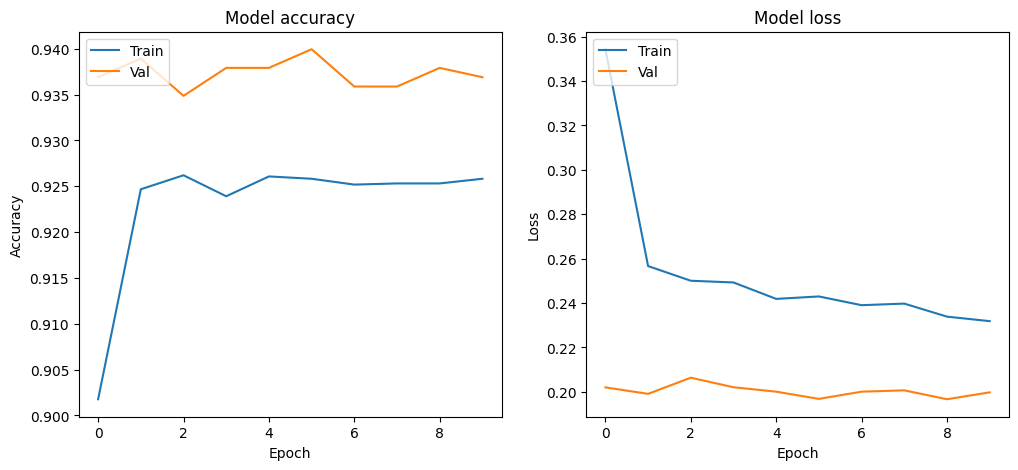

In [53]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_snli)


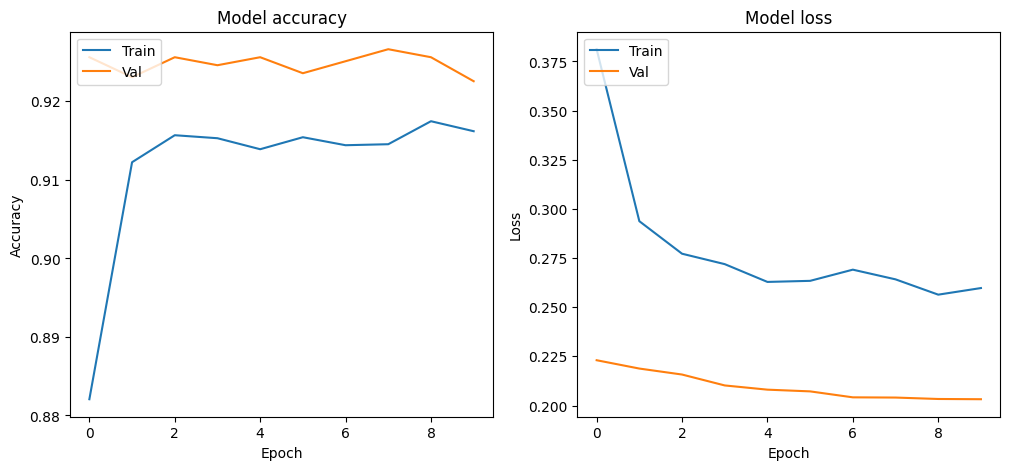

In [54]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_mnli_matched)


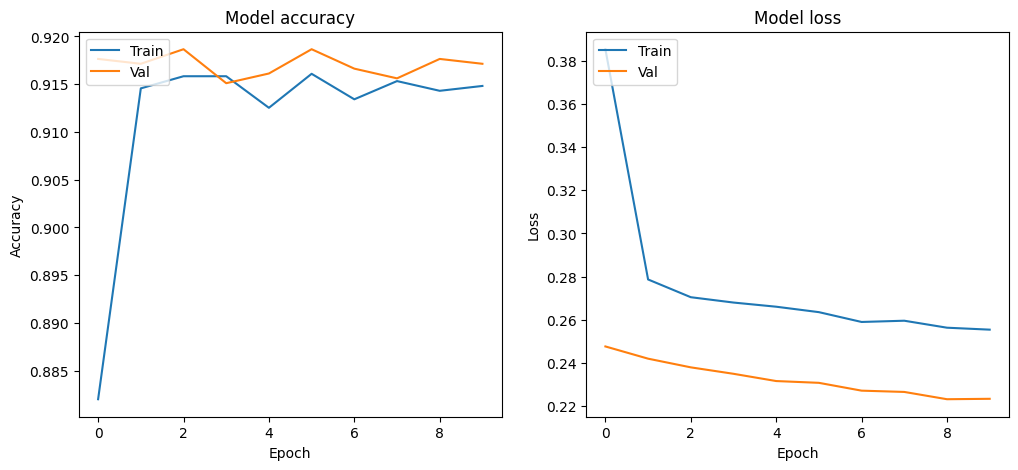

In [55]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_mnli_mismatched)


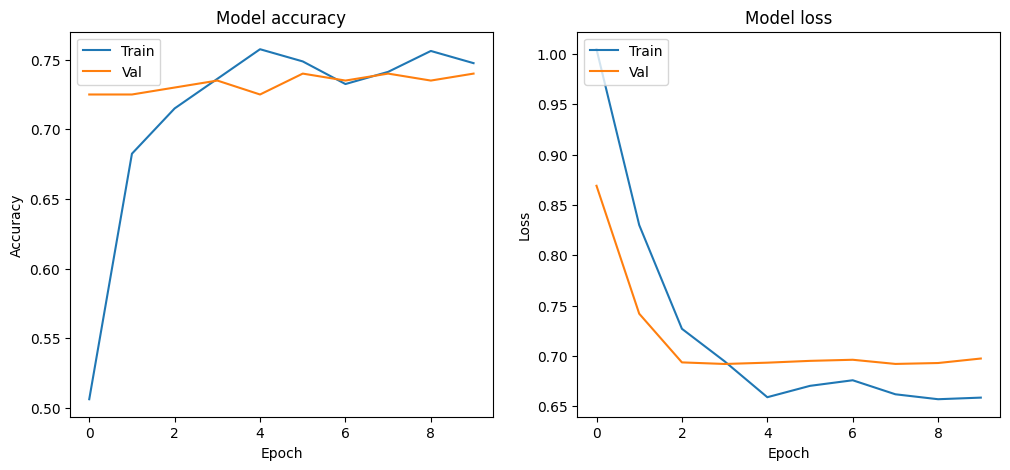

In [56]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_anli_r1)


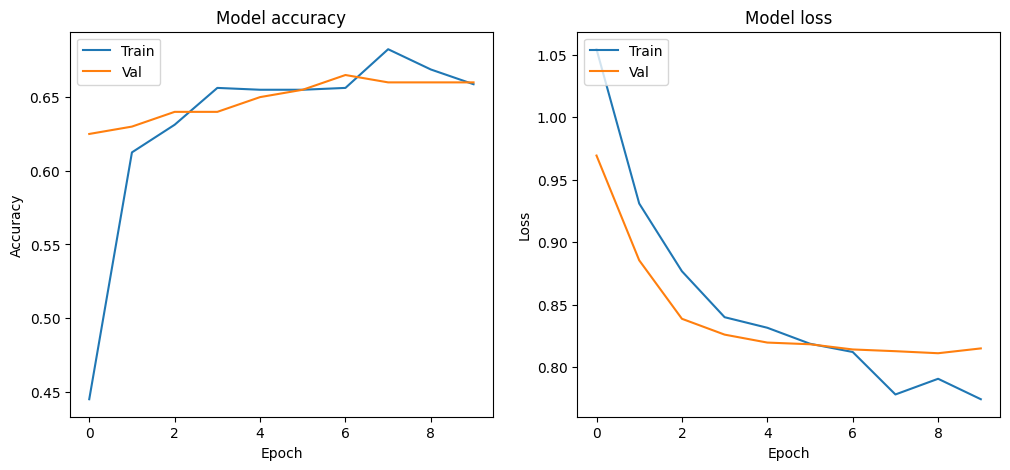

In [57]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_anli_r2)


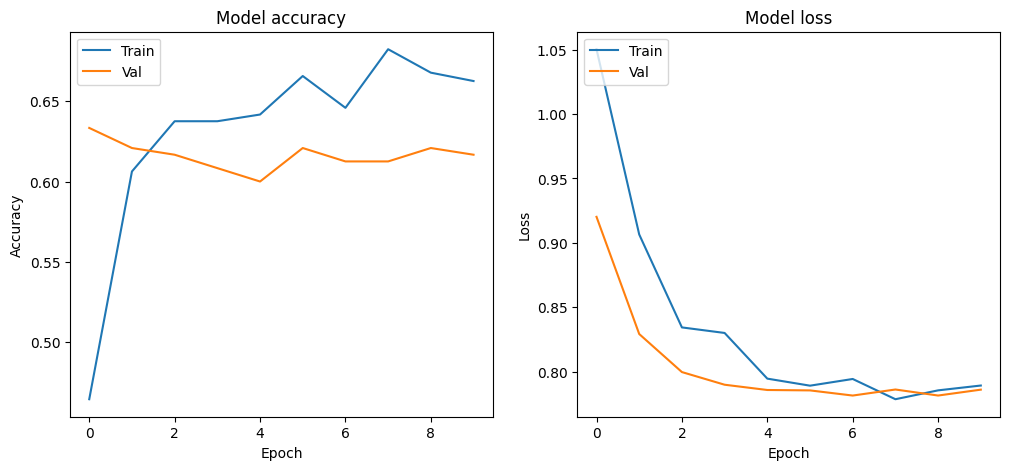

In [58]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_anli_r3)


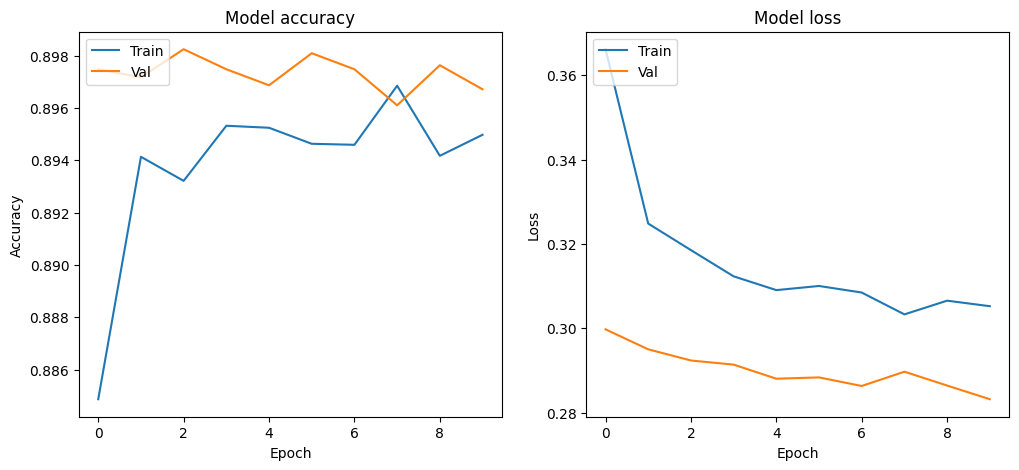

In [60]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_all_fcnn)
